In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [2]:
X,y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [3]:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [4]:
X_train.shape

(60000, 784)

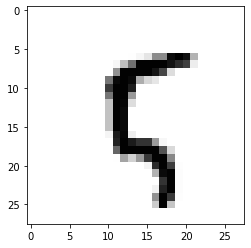

In [5]:
plt.imshow(X_train[100,:].reshape(28,28), cmap='Greys')

In [6]:
y_train[100]

'5'

In [7]:
lr = LogisticRegression(solver='lbfgs', tol=.1, multi_class='multinomial', max_iter=400)
%time lr.fit(X_train, y_train)

CPU times: user 2min 3s, sys: 419 ms, total: 2min 3s
Wall time: 31.4 s


/Users/shannonneeleytass/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=400, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.1, verbose=0, warm_start=False)

In [8]:
yhat = lr.predict(X_test)

In [9]:
cm = pd.crosstab(yhat, y_test)

In [11]:
cm

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,954,0,5,3,2,11,12,1,7,8
1,0,1110,12,2,3,4,2,6,14,6
2,1,8,920,19,5,2,9,23,4,2
3,4,2,17,921,4,41,2,10,24,9
4,1,0,10,2,916,11,6,5,8,21
5,6,1,4,25,0,765,17,1,22,7
6,6,3,11,4,10,13,907,0,7,0
7,2,2,9,9,5,6,1,947,13,22
8,5,9,40,19,9,33,1,2,862,11


In [18]:
from sklearn.metrics import confusion_matrix

In [20]:
score = lr.score(X_test, y_test)
print(score)

0.9225


In [45]:
cm = confusion_matrix(y_test, yhat)

In [46]:
cm

array([[ 954,    0,    1,    4,    1,    6,    6,    2,    5,    1],
       [   0, 1110,    8,    2,    0,    1,    3,    2,    9,    0],
       [   5,   12,  920,   17,   10,    4,   11,    9,   40,    4],
       [   3,    2,   19,  921,    2,   25,    4,    9,   19,    6],
       [   2,    3,    5,    4,  916,    0,   10,    5,    9,   28],
       [  11,    4,    2,   41,   11,  765,   13,    6,   33,    6],
       [  12,    2,    9,    2,    6,   17,  907,    1,    1,    1],
       [   1,    6,   23,   10,    5,    1,    0,  947,    2,   33],
       [   7,   14,    4,   24,    8,   22,    7,   13,  862,   13],
       [   8,    6,    2,    9,   21,    7,    0,   22,   11,  923]])

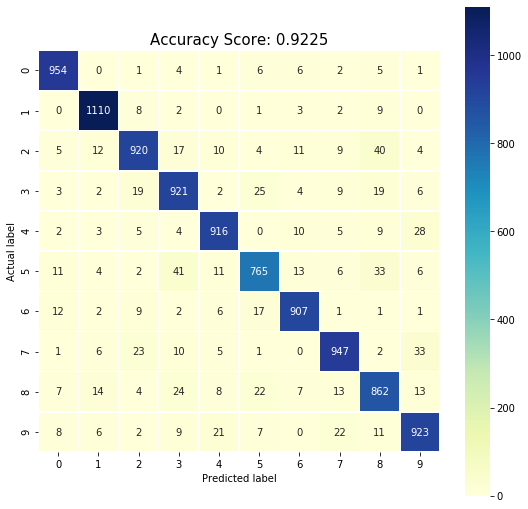

In [42]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'YlGnBu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [47]:
np.fill_diagonal(cm,0)

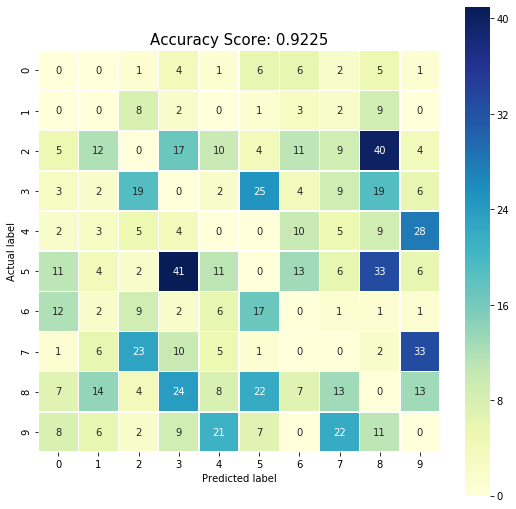

In [48]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'YlGnBu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [50]:
from sklearn import metrics

In [57]:
metrics.f1_score(y_test, yhat, average='macro')

0.9214095530874739

In [59]:
metrics.f1_score(y_test, yhat, average='micro')

0.9225

In [60]:
metrics.precision_score(y_test, yhat, average='macro')

0.9217969527731439

In [66]:
metrics.precision_score(y_test, yhat, average='micro')

0.9225

In [64]:
metrics.recall_score(y_test, yhat, average='macro')

0.9212958235405353

In [65]:
metrics.recall_score(y_test, yhat, average='micro')

0.9225

In [67]:
print(metrics.classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.89      0.91      1032
           3       0.89      0.91      0.90      1010
           4       0.93      0.93      0.93       982
           5       0.90      0.86      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.93      1028
           8       0.87      0.89      0.88       974
           9       0.91      0.91      0.91      1009

   micro avg       0.92      0.92      0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



### Multi-class ROC curve
#### code modified from https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

In [122]:
n_classes = 10

In [123]:
y_prob = lr.predict_proba(X_test)

In [86]:
y_prob[0,0:10]

array([1.97974415e-08, 1.48587475e-17, 3.84625688e-08, 2.59042290e-03,
       5.71263577e-09, 4.27211099e-06, 3.72688485e-14, 9.97194733e-01,
       1.12308778e-05, 1.99277472e-04])

In [87]:
from sklearn.preprocessing import label_binarize

In [100]:
y_test_bin = label_binarize(y_test, classes = ['0','1','2','3','4','5','6','7','8','9'])

In [102]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])


In [104]:
fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])

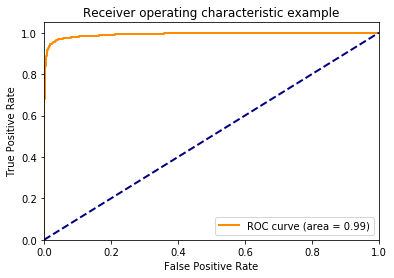

In [114]:
#Plot of a ROC curve for a specific class
my_class = 9
plt.figure()
lw = 2
plt.plot(fpr[my_class], tpr[my_class], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[my_class])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [115]:
roc_auc

{0: 0.9987480202724105,
 1: 0.9982244683467878,
 2: 0.9871318953177188,
 3: 0.9916897763191224,
 4: 0.9951857994804688,
 5: 0.9875011324002354,
 6: 0.9972952711055205,
 7: 0.9933195752978138,
 8: 0.986295807093448,
 9: 0.991910642059304,
 'micro': 0.9934630533333334}

In [120]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

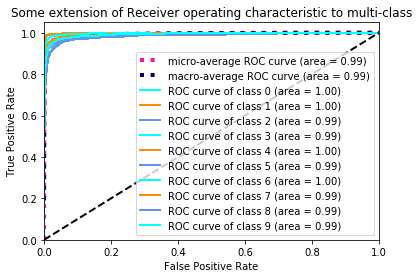

In [121]:
# Plot ROC curves for the multiclass problem


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()